# Use Stochastic RSI To Determine When To Buy And Sell Stocks

Based on [Use Stochastic RSI And Python To Determine When To Buy And Sell Stocks](https://www.youtube.com/watch?v=JGB9jm8OWFs) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

## Description
This program uses the Stohastic Relative Strength Index (stochRSI) indicator to determine if asset is over bought or over sold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [2]:
df = pd.read_csv("AAPL_Data.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04,132.895605,132.985181,126.167216,128.804825,143301900,0.0,0
1,2021-01-05,128.287243,131.123921,127.829387,130.397324,97664900,0.0,0
2,2021-01-06,127.122723,130.437152,125.788985,126.007957,155088000,0.0,0
3,2021-01-07,127.759729,131.014441,127.262067,130.307755,109578200,0.0,0
4,2021-01-08,131.810677,132.009754,129.620969,131.432465,105158200,0.0,0
...,...,...,...,...,...,...,...,...
183,2021-09-24,145.660004,147.470001,145.559998,146.919998,53477900,0.0,0
184,2021-09-27,145.470001,145.960007,143.820007,145.369995,74150700,0.0,0
185,2021-09-28,143.250000,144.750000,141.690002,141.910004,108972300,0.0,0
186,2021-09-29,142.470001,144.449997,142.029999,142.830002,74602000,0.0,0


Set the date as index

In [4]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [5]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-04,2021-01-04,132.895605,132.985181,126.167216,128.804825,143301900,0.0,0
2021-01-05,2021-01-05,128.287243,131.123921,127.829387,130.397324,97664900,0.0,0
2021-01-06,2021-01-06,127.122723,130.437152,125.788985,126.007957,155088000,0.0,0
2021-01-07,2021-01-07,127.759729,131.014441,127.262067,130.307755,109578200,0.0,0
2021-01-08,2021-01-08,131.810677,132.009754,129.620969,131.432465,105158200,0.0,0
...,...,...,...,...,...,...,...,...
2021-09-24,2021-09-24,145.660004,147.470001,145.559998,146.919998,53477900,0.0,0
2021-09-27,2021-09-27,145.470001,145.960007,143.820007,145.369995,74150700,0.0,0
2021-09-28,2021-09-28,143.250000,144.750000,141.690002,141.910004,108972300,0.0,0
2021-09-29,2021-09-29,142.470001,144.449997,142.029999,142.830002,74602000,0.0,0


Create Exponential Moiving Average (EMA) indicator function

In [6]:
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

Create a fuction to calculate the Stohastic RSI (Relative Strength Index)

In [7]:
def StochRSI(data, period=14, column='Close'):
    delta = df['Close'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    
    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    
    return stockrsi

Store the stohastic RSI data in a new column

In [8]:
df['StochRSI'] = StochRSI(df)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,up,down,StochRSI
2021-01-04,2021-01-04,132.895605,132.985181,126.167216,128.804825,143301900,0.0,0,NaN,NaN,NaN
2021-01-05,2021-01-05,128.287243,131.123921,127.829387,130.397324,97664900,0.0,0,1.592499,0.000000,NaN
2021-01-06,2021-01-06,127.122723,130.437152,125.788985,126.007957,155088000,0.0,0,0.000000,-4.389366,NaN
2021-01-07,2021-01-07,127.759729,131.014441,127.262067,130.307755,109578200,0.0,0,4.299797,0.000000,NaN
2021-01-08,2021-01-08,131.810677,132.009754,129.620969,131.432465,105158200,0.0,0,1.124710,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,2021-09-24,145.660004,147.470001,145.559998,146.919998,53477900,0.0,0,0.089996,0.000000,0.408946
2021-09-27,2021-09-27,145.470001,145.960007,143.820007,145.369995,74150700,0.0,0,0.000000,-1.550003,0.361691
2021-09-28,2021-09-28,143.250000,144.750000,141.690002,141.910004,108972300,0.0,0,0.000000,-3.459991,0.132939
2021-09-29,2021-09-29,142.470001,144.449997,142.029999,142.830002,74602000,0.0,0,0.919998,0.000000,0.465638


Plot the data

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871., 18901.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

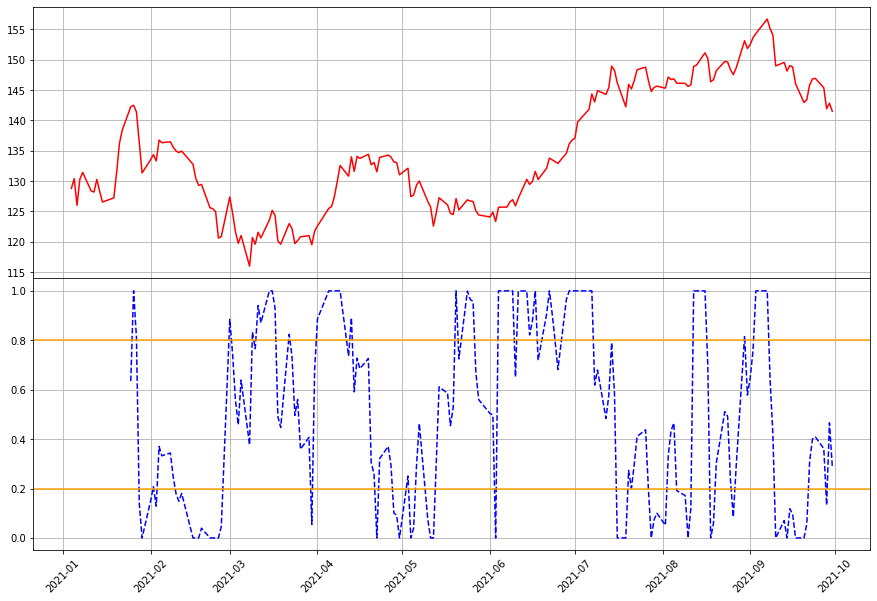

In [10]:
fix, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,10))
# Close the veritcal gaps between subplots
plt.subplots_adjust(hspace=.0)
# Set the grid lines
ax1.grid()
ax2.grid()
# Plot the close price
ax1.plot(df.index, df['Close'], color = 'r')
# Plot the StohRSI
ax2.plot(df.index, df['StochRSI'], color='b', linestyle='--')
# Plot the oversold (0.2) and overbought (0.8) lines
ax2.axhline(0.20, color = 'orange')
ax2.axhline(0.80, color = 'orange')
# Rotate the x ticks by 45 degrees
plt.xticks(rotation=45)

**THIS IS NOT AN INVESTMENT ADVICE!**